#Stroke Prediction

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv',header='infer')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
for index, column in enumerate(data.columns):
    print(f"indice: {index}, nome do atributo: {column}")

indice: 0, nome do atributo: id
indice: 1, nome do atributo: gender
indice: 2, nome do atributo: age
indice: 3, nome do atributo: hypertension
indice: 4, nome do atributo: heart_disease
indice: 5, nome do atributo: ever_married
indice: 6, nome do atributo: work_type
indice: 7, nome do atributo: Residence_type
indice: 8, nome do atributo: avg_glucose_level
indice: 9, nome do atributo: bmi
indice: 10, nome do atributo: smoking_status
indice: 11, nome do atributo: stroke


The column bmi indicates the body mass index. As the body mass index is associated with an increased risk of stroke, the row object which has this value as null it was dropped.

In [4]:
data.dropna(subset=['bmi'], inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
conditionNull = (data.iloc[:, 8].isnull())
newDatasetNull = data.loc[conditionNull]
newDatasetNull

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [6]:
data = data.replace('Unknown', pd.NA).dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [7]:
data['smoking_status'] = np.where((data.iloc[:, 10] == 'never smoked'), 0, 1)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,0,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0


#Model Training

In [10]:
atributos = data[['smoking_status', 'bmi', 'avg_glucose_level', 'heart_disease', 'hypertension', 'age']]
alvo = data['stroke']

atributoTrainingRf, atributoTestRf, alvoTrainingRf, alvoTestRf = train_test_split(
    atributos, alvo, test_size=0.2, random_state=40, stratify=alvo
)

In [11]:
rf = RandomForestClassifier(random_state=40)
rf.fit(atributoTrainingRf, alvoTrainingRf)

RandomForestClassifier(random_state=40)

In [12]:
atributoPredRF = rf.predict(atributoTestRf)

In [19]:
# Avaliação das métricas
accuracy = accuracy_score(alvoTestRf, atributoPredRF)
precision = precision_score(alvoTestRf, atributoPredRF, pos_label=1, zero_division=0)
recall = recall_score(alvoTestRf, atributoPredRF, pos_label=1, zero_division=0)
f1 = f1_score(alvoTestRf, atributoPredRF, pos_label=1, zero_division=0)
roc_auc = roc_auc_score(alvoTestRf, rf.predict_proba(atributoTestRf)[:, 1])

# Impressão das métricas
print(f"Acurácia do modelo Random Forest: {accuracy:.2f}")
print(f"Precisão do modelo Random Forest: {precision:.2f}")
print(f"Recall do modelo Random Forest: {recall:.2f}")
print(f"F1-Score do modelo Random Forest: {f1:.2f}")
print(f"AUC-ROC do modelo Random Forest: {roc_auc:.2f}")


Acurácia do modelo Random Forest: 0.94
Precisão do modelo Random Forest: 0.20
Sensibilidade (Recall) do modelo Random Forest: 0.03
F1-Score do modelo Random Forest: 0.05
AUC-ROC do modelo Random Forest: 0.76


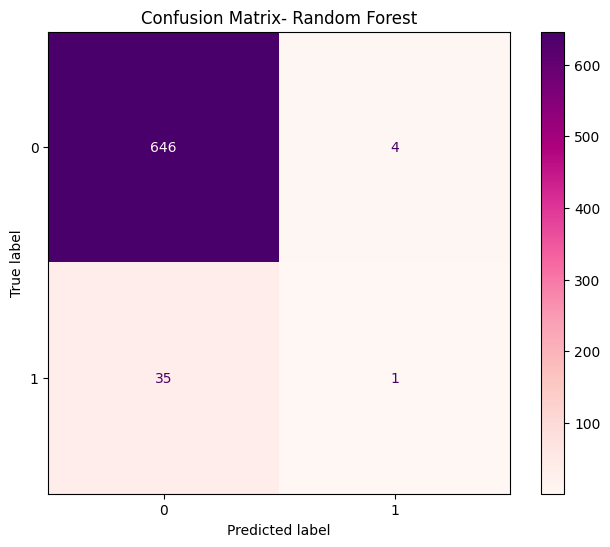

In [24]:
confusionMatrixRF = confusion_matrix(alvoTestRf, atributoPredRF)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

dispRf = ConfusionMatrixDisplay(confusion_matrix=confusionMatrixRF, display_labels=rf.classes_)
dispRf.plot(ax=ax, cmap=plt.cm.RdPu)

ax.set_title("Confusion Matrix- Random Forest")
plt.show()


In [25]:
positives_cases = data[data['stroke'] == 1]

stroke = data['stroke']
stroke
total = stroke.count()
print(f"QTotal: {total}")
quantidadeFalse = (((stroke == 0).sum()*100)/total)
quantidadeTrue = (((stroke == 1).sum()*100)/total)

print(f"Non-stroke: {quantidadeFalse}")
print(f"Stroke: {quantidadeTrue}")

QTotal: 3426
Non-stroke: 94.7460595446585
Stroke: 5.253940455341506
